In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


<img src="https://media.istockphoto.com/id/1359314170/photo/heart-attack-and-heart-disease-3d-illustration.jpg?s=612x612&w=0&k=20&c=K5Y-yzsfs7a7CyuAw-B222EMkT04iRmiEWzhIqF0U9E=" alt="alt text">


## <div style="background-color: black; color: #ff1493; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Data Description</span></div>

<div style="background-color: black; padding: 10px;">
    <table style="color:tan;">
        <tr>
            <th>Number Of Columns</th>
            <th>Column Name</th>
            <th>Meaning</th>
        </tr>
        <tr>
            <td style="color: red;">1</td>
            <td style="color: red;">Age</td>
            <td style="color: red;">Ages of patients</td>
        </tr>
        <tr>
            <td style="color: #1E96FC;">2</td>
            <td style="color:#1E96FC;">Sex</td>
            <td style="color: #1E96FC;">Male or Female</td>
        </tr>
        <tr>
            <td style="color: yellow;">3</td>
            <td style="color: yellow;">ChestPainType</td>
            <td style="color: yellow;">categorizes chest discomfort</td>
        </tr>
        <tr>
            <td style="color: green;">4</td>
            <td style="color: green;">RestingBP</td>
            <td style="color: green;">Resting Blood Pressure</td>
        </tr>
        <tr>
            <td style="color:  #ff1493;">5</td>
            <td style="color:  #ff1493;">Cholesterol</td>
            <td style="color:  #ff1493;">type of fat found in your blood</td>
        </tr>
        <tr>
            <td style="color: #2EC4B6;" >6</td>
            <td style="color: #2EC4B6;">FastingBS</td>
            <td style="color: #2EC4B6;">Fasting Blood Sugar</td>
        </tr>
        <tr>
            <td style="color: violet;">7</td>
            <td style="color: violet;">RestingECG</td>
            <td style="color: violet;">Resting Electrocardiogram</td>
        </tr>
        <tr>
            <td style="color: red;">8</td>
            <td style="color: red;">MaxHR</td>
            <td style="color: red;">Maximum Heart Rate</td>
        </tr>
        <tr>
            <td style="color: #33CCFF;">9</td>
            <td style="color: #33CCFF;">ExerciseAngina</td>
            <td style="color: #33CCFF;"> refers to chest pain or discomfort that occurs during physical exertion or exercise</td>
        </tr>
            <tr>
            <td style="color: #2EC4B6;">10</td>
            <td style="color: #2EC4B6;">Oldpeak</td>
            <td style="color: #2EC4B6;">refers to the ST depression induced by exercise relative to rest</td>
        </tr>
            <tr>
            <td style="color: #ff1493;">11</td>
            <td style="color: #ff1493;">ST_Slope</td>
            <td style="color: #ff1493;">refers to the slope of the ST segment on an electrocardiogram (ECG) during exercise testing</td>
        </tr>
                  <tr>
            <td style="color: orange;">12</td>
            <td style="color: orange;">HeartDisease</td>
            <td style="color: orange;">Final result (1: Yes, the individual has HeartDisease; 0: No, the individual does not have HeartDisease)</td>
        </tr>
    </table>
</div>


## <div style="background-color: #ffffcc; color: #800080; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Summary    We have data to determine if he has heart disease, and this is done by identifying symptoms and signs that predict this disease, the most prominent of which is (age: it is an important factor because we note that most people with heart disease are older) (type of chest pain: which is lack of feeling  By resting on the chest and causing heaviness on it ((resting blood pressure and the pressure is at normal, otherwise it may lead to disease) (cholesterol: if the percentage of fat in the body is high, the incidence of disease increases)(Echocardiogram: an electrocardiogram that determines the heartbeat to determine the cause of heart disease) (Max HR: gives a specific limit for the heartbeat, and exceeding or contracting it leads to problems such as acceleration)</span></div>


## <div style="background-color: #87ceeb; color: red; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Step 1: Importing Libraries 📚</span></div>


In [2]:
import pandas as pd 
import numpy as np                              
import seaborn as sns # visulization   
import matplotlib.pyplot as plt # visulization   
import plotly.express as px # visulization
from plotly.offline import iplot # visulization
import plotly.graph_objects as go # visulization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  AdaBoostClassifier ,GradientBoostingClassifier ,BaggingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,classification_report,precision_score,recall_score,f1_score
import missingno as msno


## <div style="background-color: #87ceeb; color: red; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Step 2: Read Data 📖</span></div>


In [3]:
data=pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

In [4]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1




## <div style="background-color: black; color: red; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Step 3 : Let's Get Quick Overview 🧐😉</span></div>



In [5]:
print(f"the rows of data => {data.shape[0]}".title())
print(f"the columns of data => {data.shape[1]}".title())

The Rows Of Data => 918
The Columns Of Data => 12


In [6]:
#data describe numeric data 
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
#data describe object data 
 
data.describe(include=['O'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## <div style="background-color: black; color: #ff1493; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Data Description</span></div>

<div style="background-color: black; padding: 10px;">
    <table style="color:tan;">
        <tr>
            <th>Number Of Columns</th>
            <th>Column Name</th>
            <th>Dtype</th>
        </tr>
        <tr>
            <td style="color: red;">1</td>
            <td style="color: red;">Age</td>
            <td style="color: red;">int64</td>
        </tr>
        <tr>
            <td style="color: #1E96FC;">2</td>
            <td style="color:#1E96FC;">Sex</td>
            <td style="color: #1E96FC;">object</td>
        </tr>
        <tr>
            <td style="color: yellow;">3</td>
            <td style="color: yellow;">ChestPainType</td>
            <td style="color: yellow;">object</td>
        </tr>
        <tr>
            <td style="color: green;">4</td>
            <td style="color: green;">RestingBP</td>
            <td style="color: green;">int64</td>
        </tr>
        <tr>
            <td style="color:  #ff1493;">5</td>
            <td style="color:  #ff1493;">Cholesterol</td>
            <td style="color:  #ff1493;">int64</td>
        </tr>
        <tr>
            <td style="color: #2EC4B6;" >6</td>
            <td style="color: #2EC4B6;">FastingBS</td>
            <td style="color: #2EC4B6;">int64</td>
        </tr>
        <tr>
            <td style="color: violet;">7</td>
            <td style="color: violet;">RestingECG</td>
            <td style="color: violet;">object</td>
        </tr>
        <tr>
            <td style="color: red;">8</td>
            <td style="color: red;">MaxHR</td>
            <td style="color: red;">int64</td>
        </tr>
        <tr>
            <td style="color: #33CCFF;">9</td>
            <td style="color: #33CCFF;">ExerciseAngina</td>
            <td style="color: #33CCFF;">object</td>
        </tr>
            <tr>
            <td style="color: #2EC4B6;">10</td>
            <td style="color: #2EC4B6;">Oldpeak</td>
            <td style="color: #2EC4B6;">float64</td>
        </tr>
            <tr>
            <td style="color: #ff1493;">11</td>
            <td style="color: #ff1493;">ST_Slope</td>
            <td style="color: #ff1493;">object</td>
        </tr>
                  <tr>
            <td style="color: orange;">12</td>
            <td style="color: orange;">HeartDisease</td>
            <td style="color: orange;">int64</td>
        </tr>
    </table>
</div>



## <div style="background-color:  #add8e6; color: #800080; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Step 4 : Lets Check of Null Values & Duplicates Records!!🤔</span></div>


In [10]:
print(f"the count of miising values in data {data.isna().sum().sum()}".title())

The Count Of Miising Values In Data 0


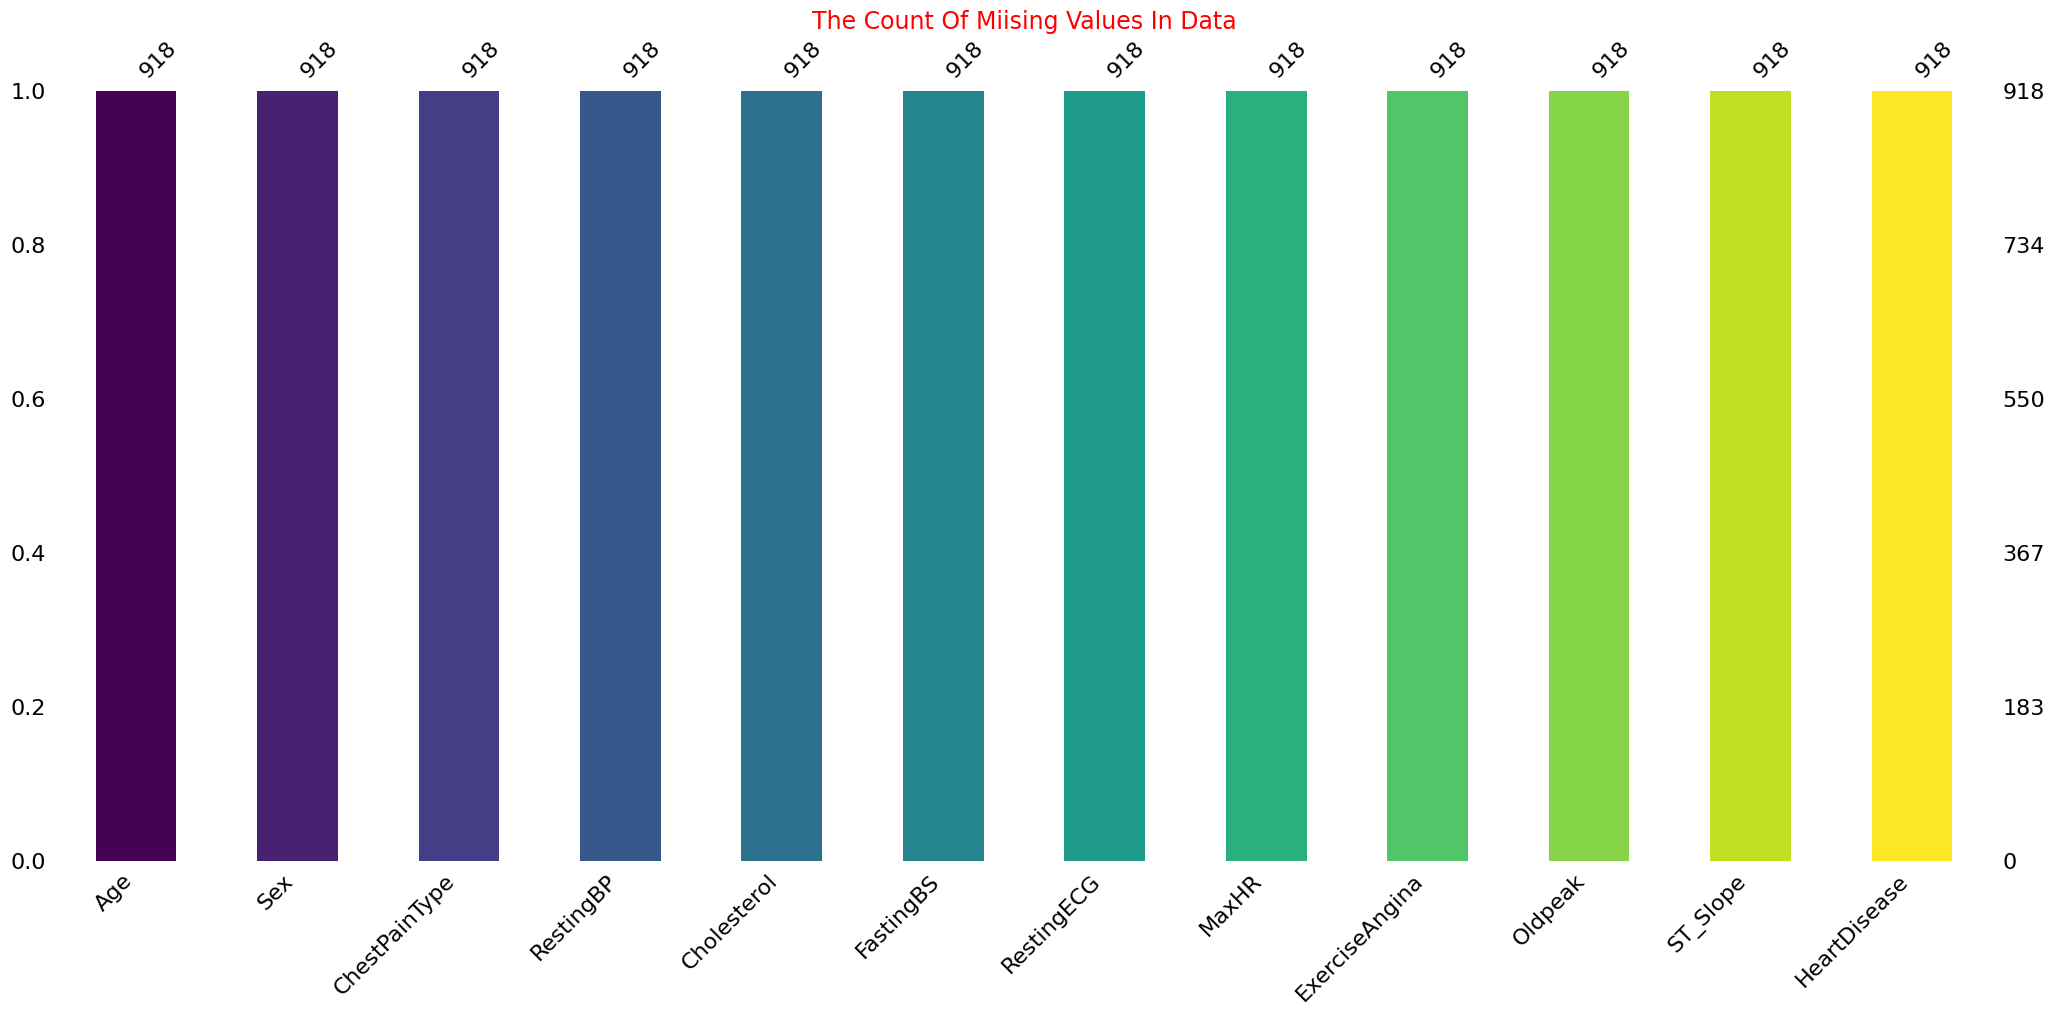

In [11]:
# visualization miising values
len_columns=len(data.columns)
color=plt.cm.viridis(np.linspace(0,1,len_columns))
msno.bar(data,color=color)
plt.title("the count of miising values in data".title(),size=17,color='red')
plt.show()

* **This library helps you understand the pattern of missing data in your dataset, enabling you to make informed decisions about how to handle it, whether by deleting missing data or filling the gaps with specific values, and so on.**
 

In [12]:
 #The sum of duplicated in data 
print(f"The Number of duplicated {data.duplicated().sum()}".title())

The Number Of Duplicated 0




## <div style="background-color: black; color: red; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Nois In Data 😦</span></div>



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



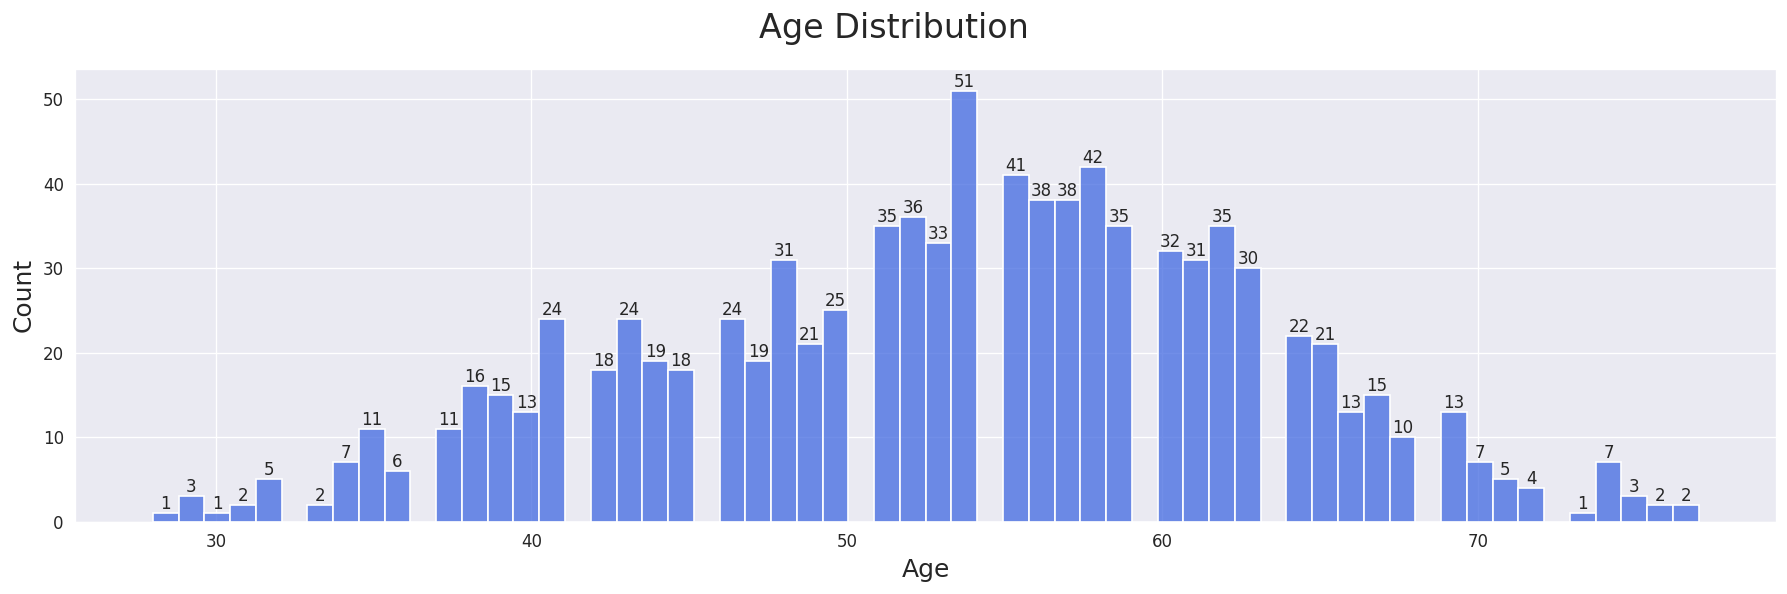

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



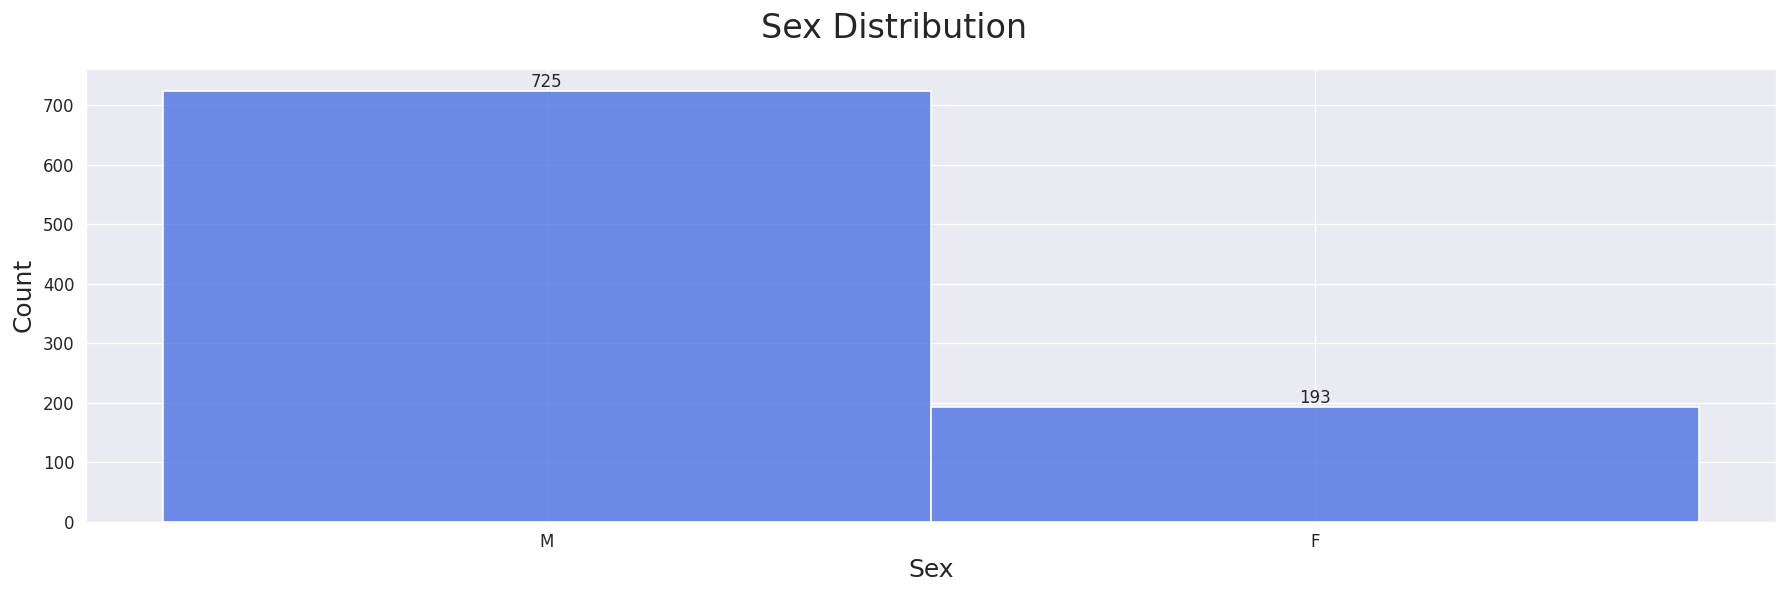

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



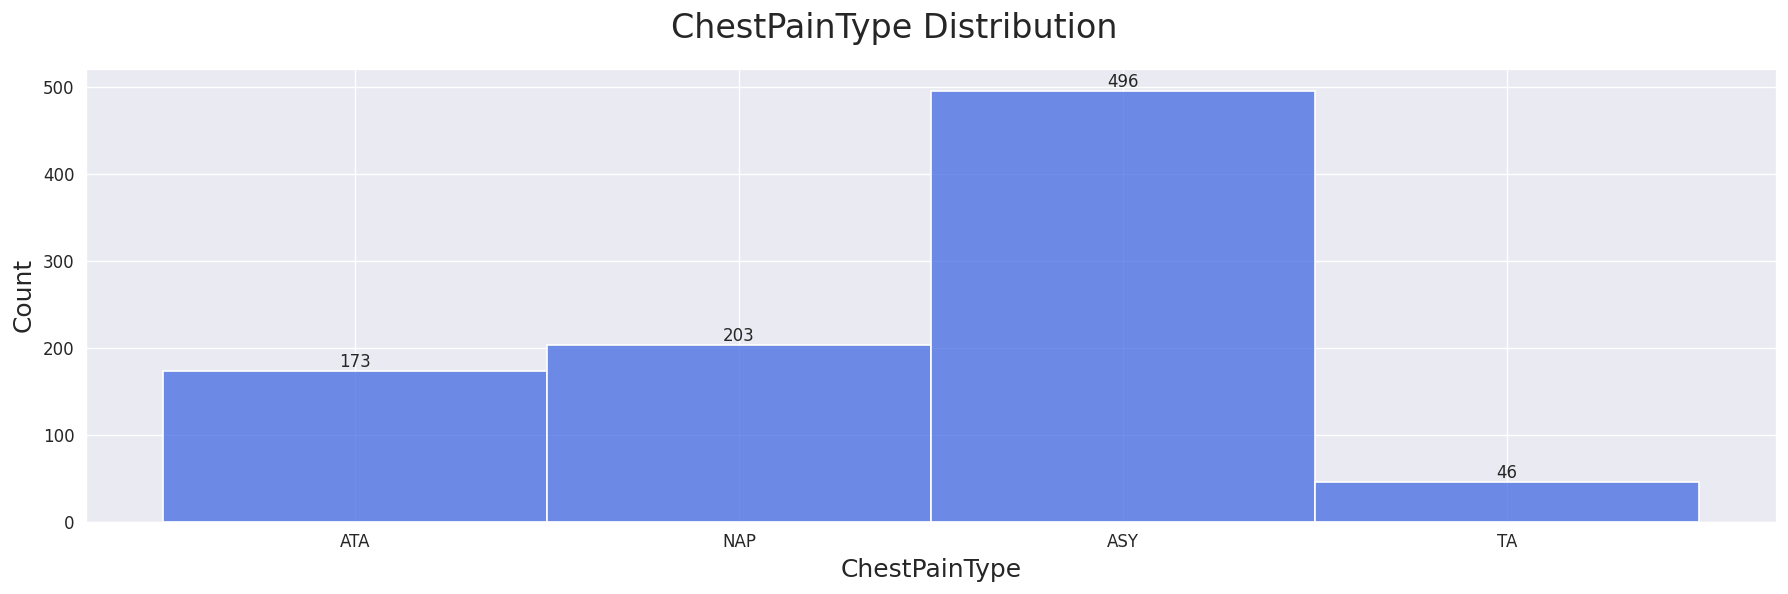

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



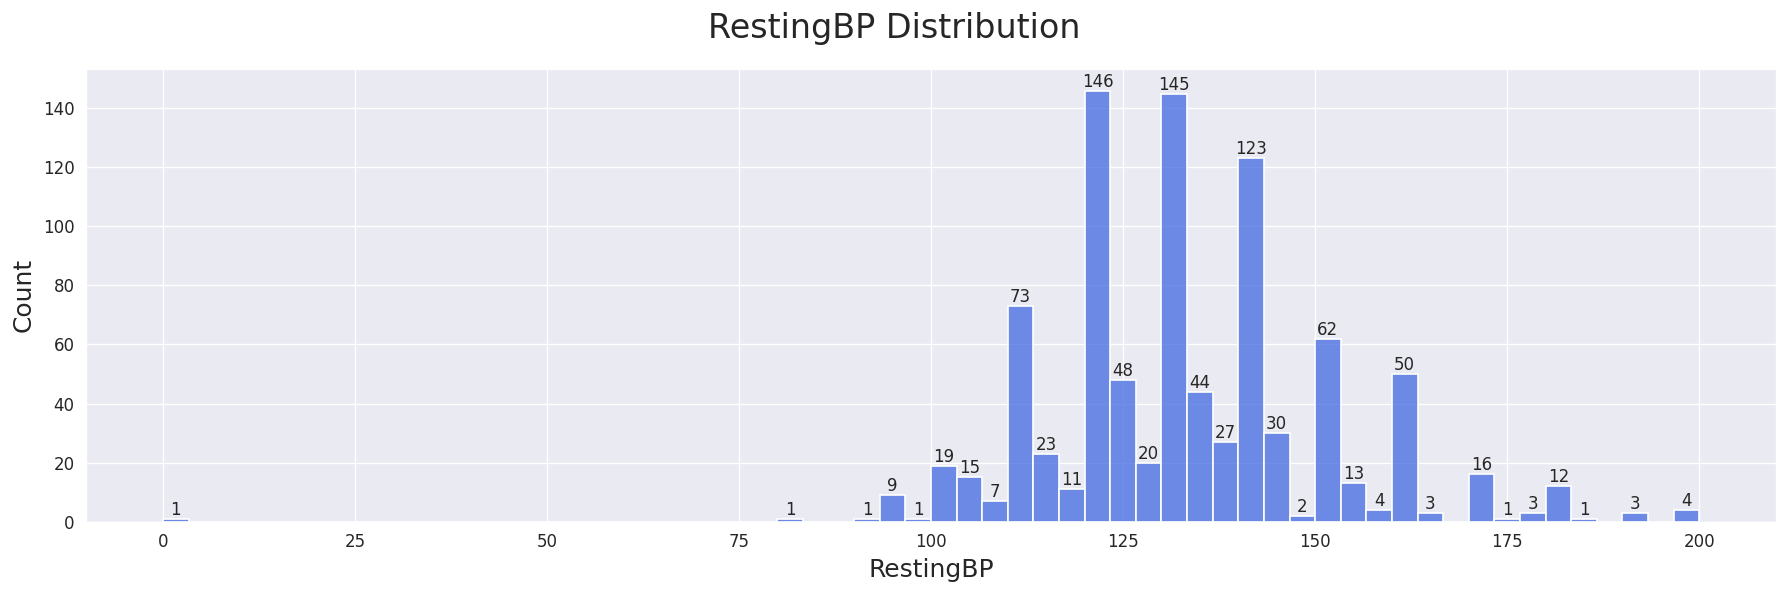

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



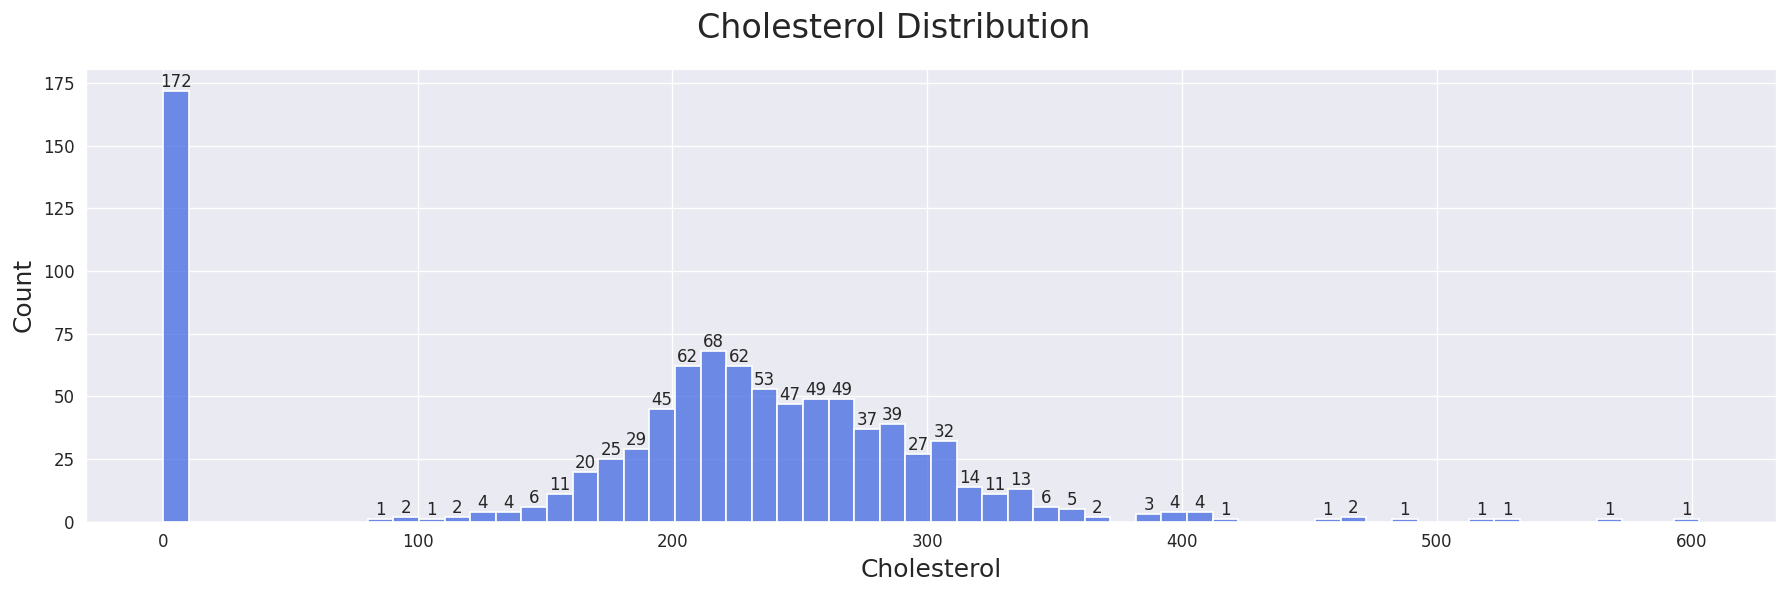

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



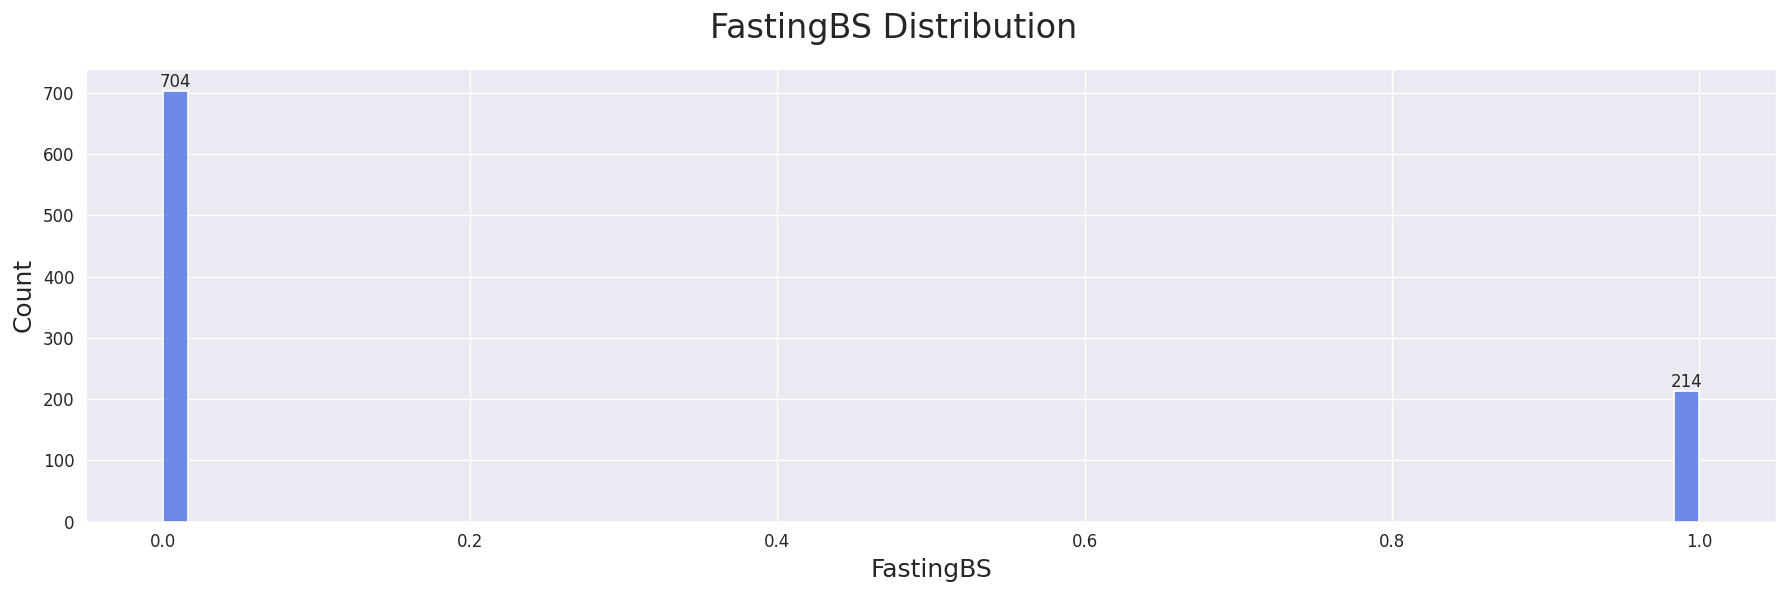

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



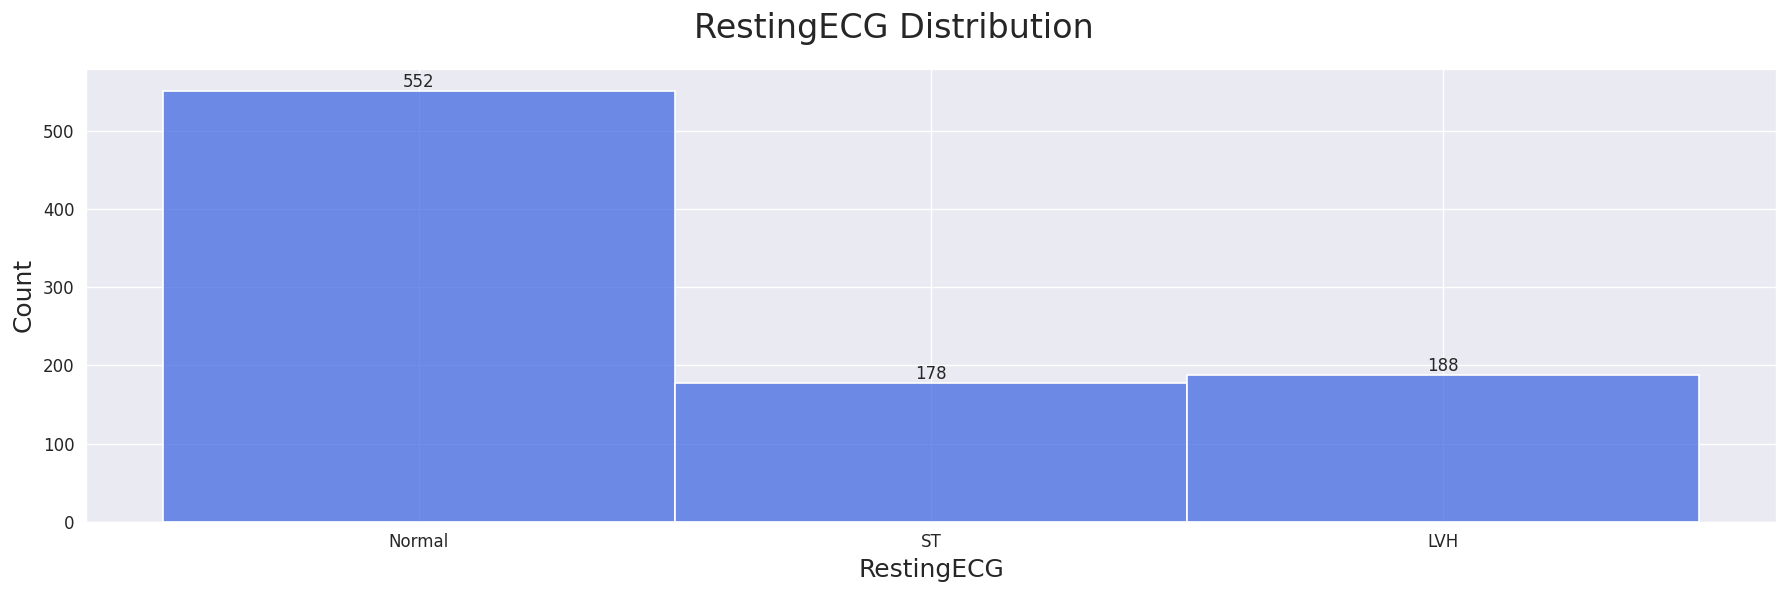

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



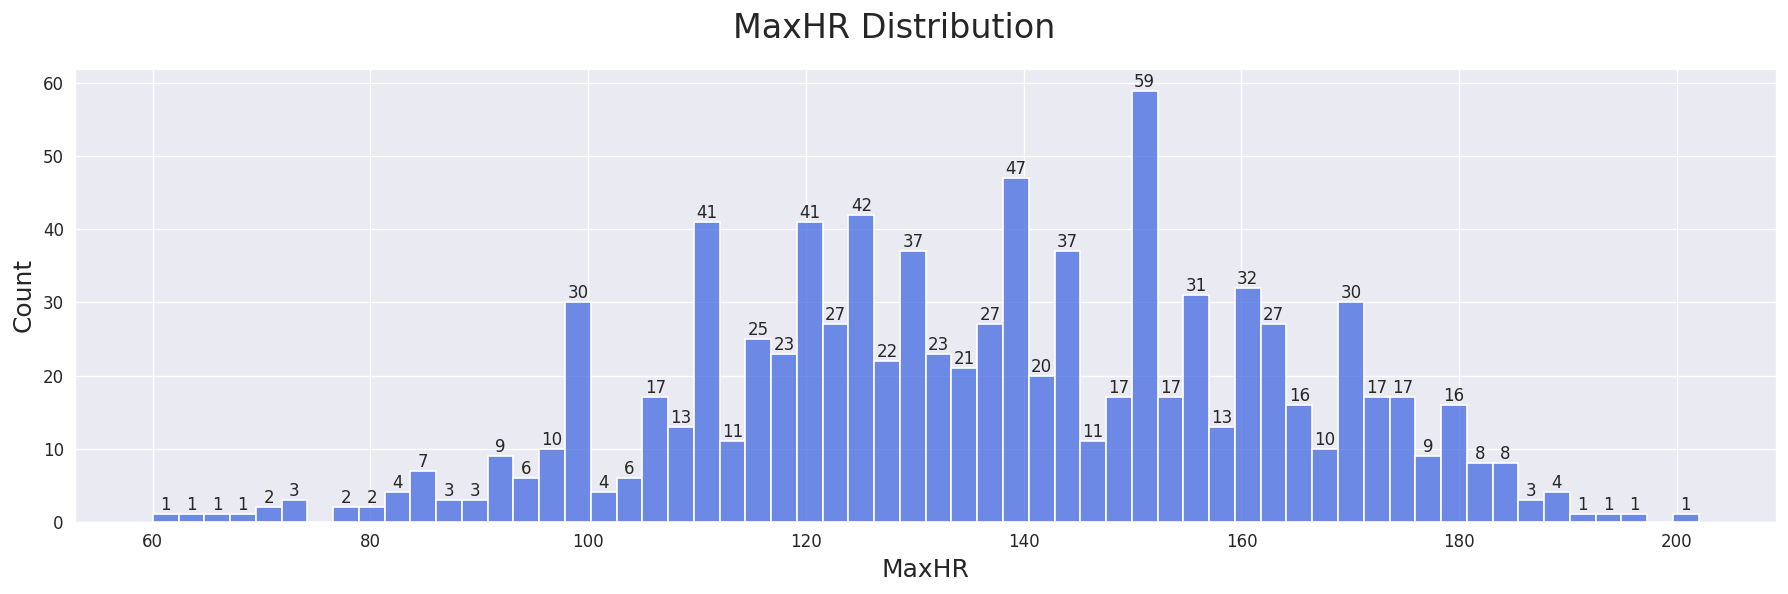

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



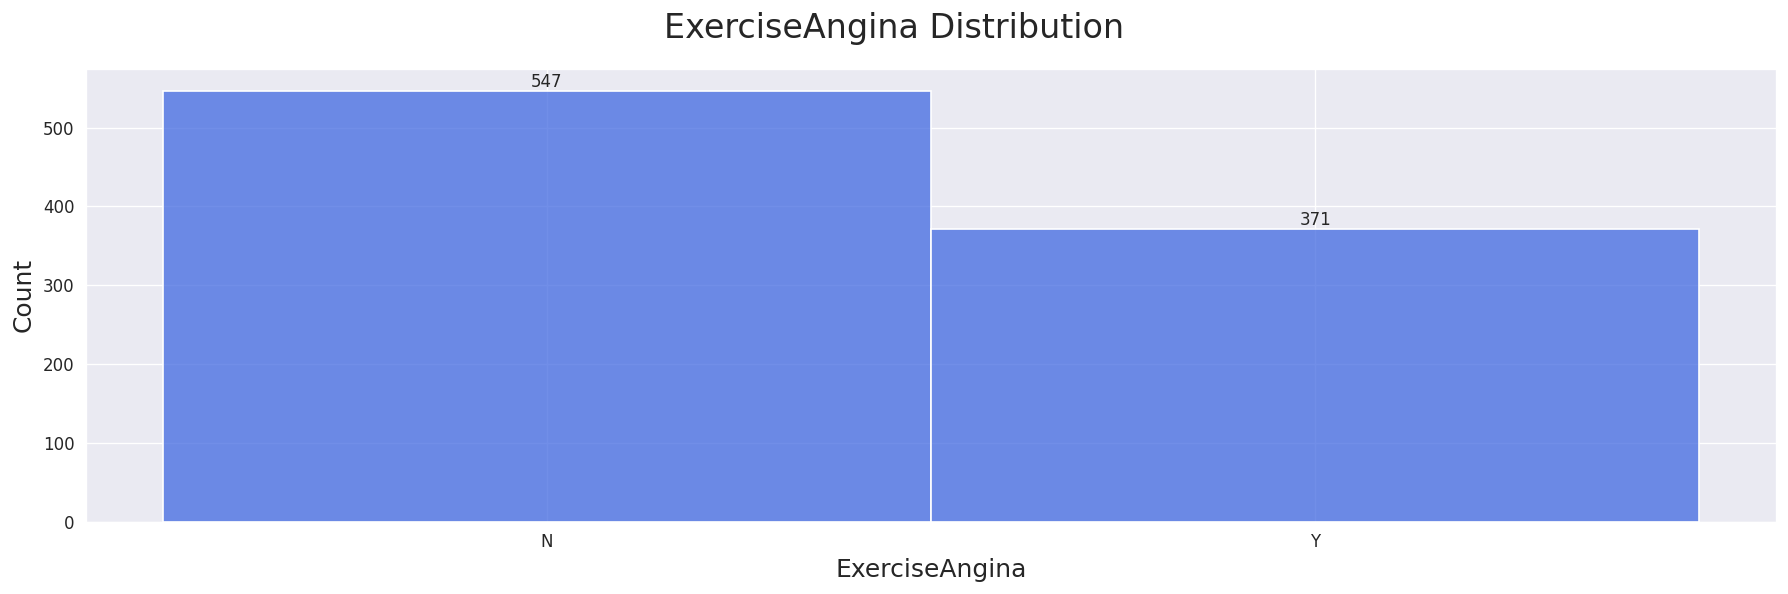

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



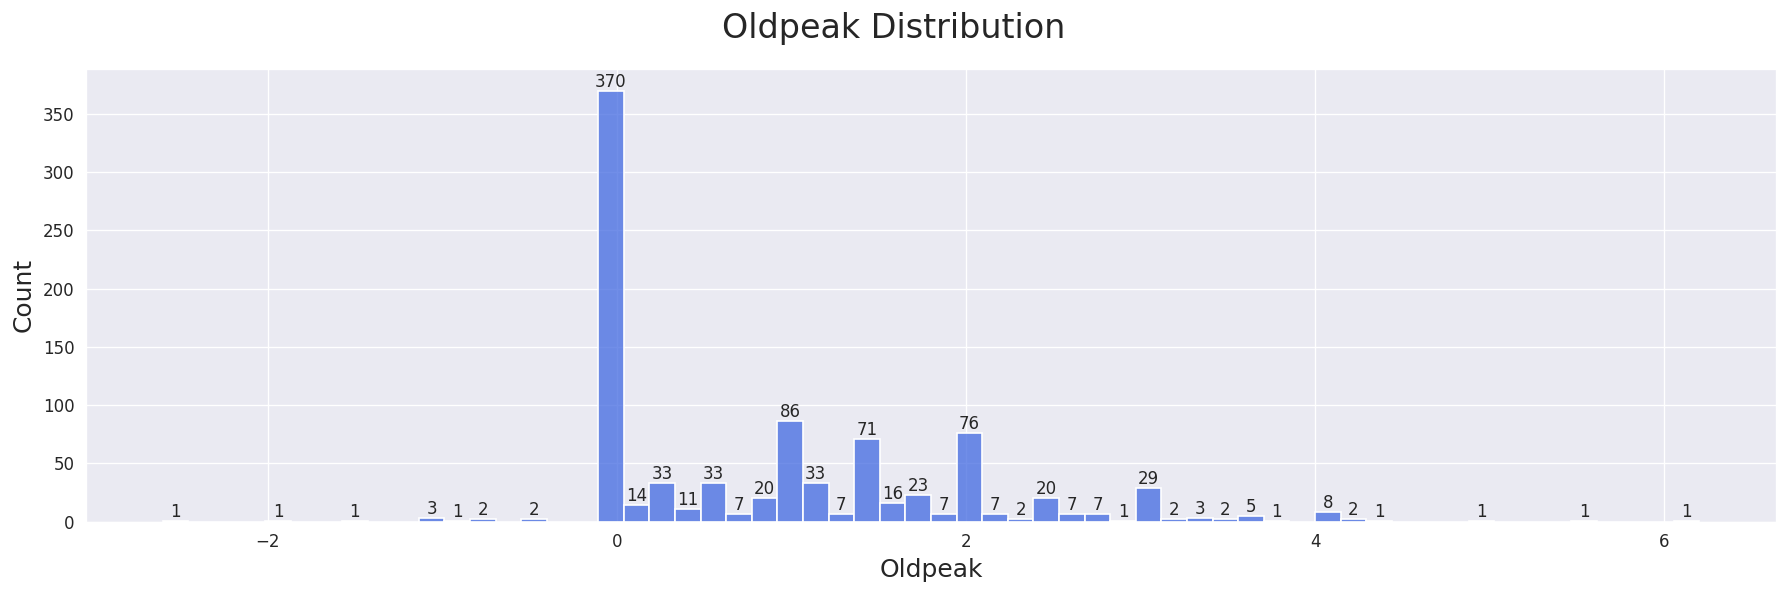

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



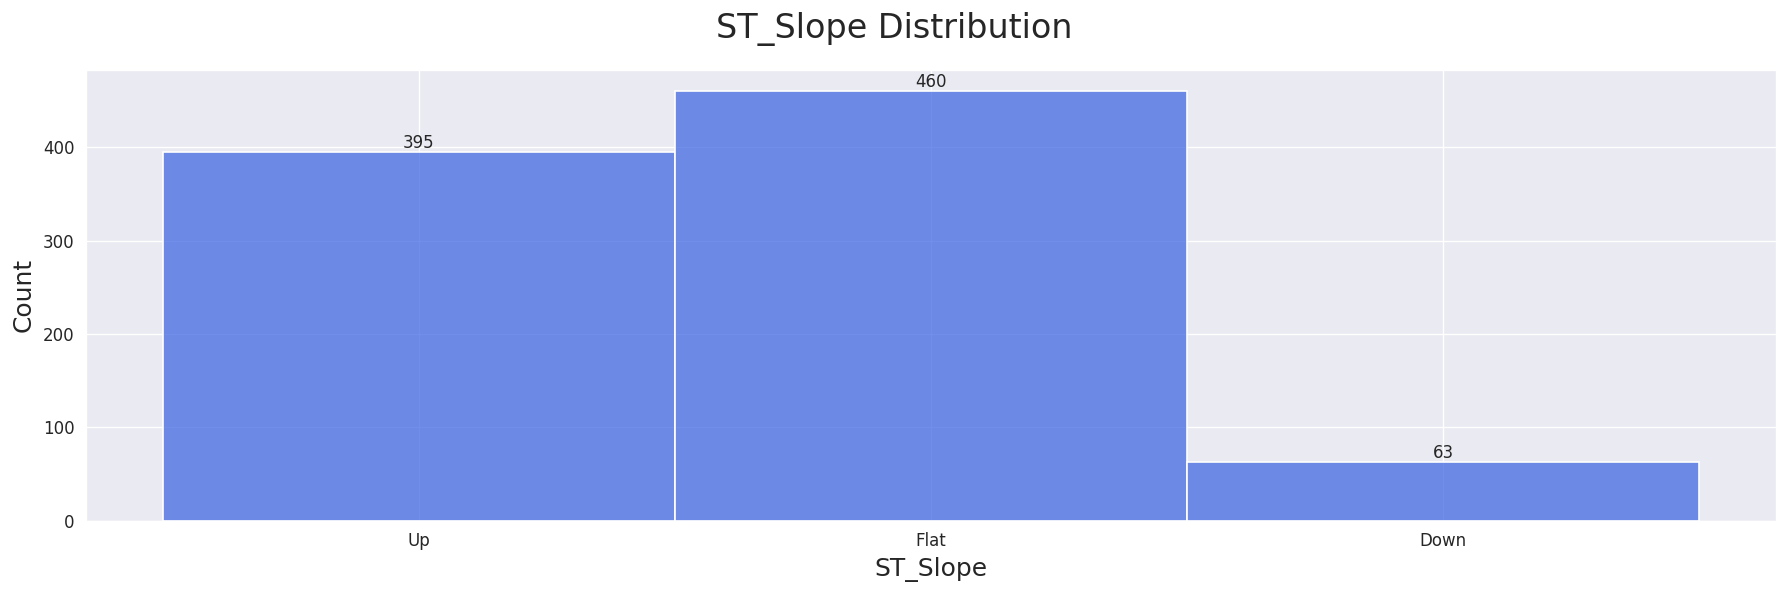

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



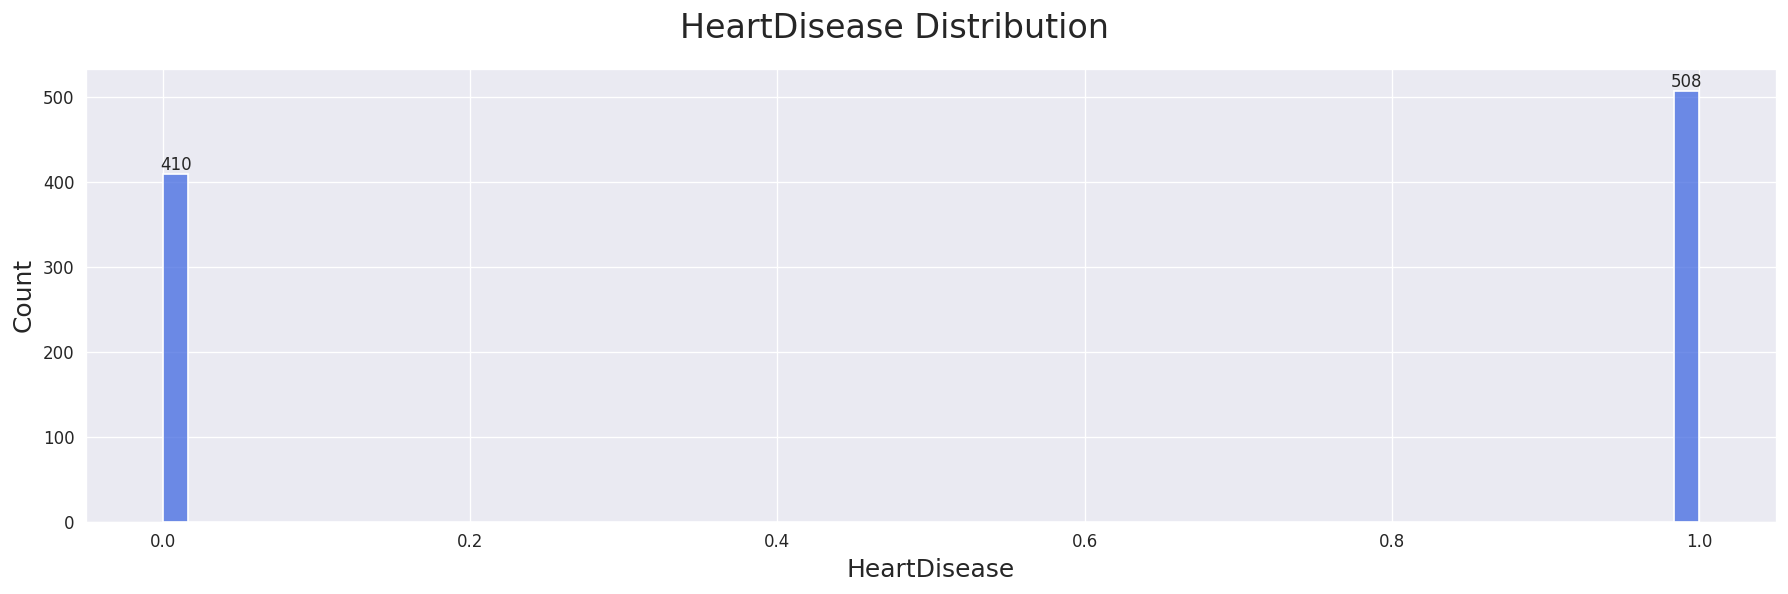

In [13]:
def noise_data(data):
  columns_numeric=data.columns
  for i in columns_numeric:
    sns.set_style('darkgrid')
    color = 'royalblue'
    plt.figure(figsize=(15,5), dpi=120)
    graph = sns.histplot(x=i, data=data, bins=60, color=color)
    labels = [str(v) if v else '' for v in graph.containers[0].datavalues]
    graph.bar_label(graph.containers[0], labels=labels)
    plt.annotate('Noise', xy=(10000,60), xytext=(12000,400), color=color, fontsize=15, 
                 arrowprops=dict(facecolor=color, shrink=0.01))
    plt.xlabel(f"{i}", fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.suptitle(f'{i} Distribution', fontsize=20)
    plt.tight_layout()
    plt.show()
noise_data(data)

## <div style="background-color:  #add8e6; color: #800080; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Step 5 :Univorte Aanlysis (Numerical)</span></div>


In [14]:
def numeric_visualization_scatter(data):
    numeric_columns = data.select_dtypes(np.number).drop(['FastingBS','HeartDisease'],axis=1).columns
    for column in numeric_columns:
        fig = px.scatter(data, x=column,color='HeartDisease',
                        template='plotly_dark',symbol="HeartDisease", color_continuous_scale=["blue", "red"]
                        ,labels={'X':column,"index":'Counts'} )

        fig.show()
numeric_visualization_scatter(data)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [15]:
def numeric_visualization_boxplot(data):
    numeric_columns = data.select_dtypes(np.number).drop(['FastingBS','HeartDisease'],axis=1).columns[1:]
    for column in numeric_columns:
        fig = px.box(data, x=column,
                        template='plotly_dark'
                        ,labels={'X':column,"index":'Counts'}, color_discrete_sequence=["red"] )

        fig.show()
numeric_visualization_boxplot(data)

In [16]:
import plotly.express as px
from plotly.offline import iplot

def object_visualization_(data):
    object_columns = data.select_dtypes(include='O').columns
    for column in object_columns:
        precantge_columns = data[column].value_counts(normalize=1) * 100
        fig = px.bar(precantge_columns,
                     x=precantge_columns.index,
                     y=precantge_columns.values,
                     color=precantge_columns.index,  
                     color_continuous_scale='reds',
                     title=f'Percentage {column}',
                     labels={'x': column, "y": 'Counts'},
                     text=precantge_columns.apply(lambda x: f"{x:.2f}%"),
                     template='plotly_dark')
        fig.update_traces(
            textposition="outside",
            textfont={"size": 12, "family": "consolas"}
        )

        iplot(fig)

object_visualization_(data)


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



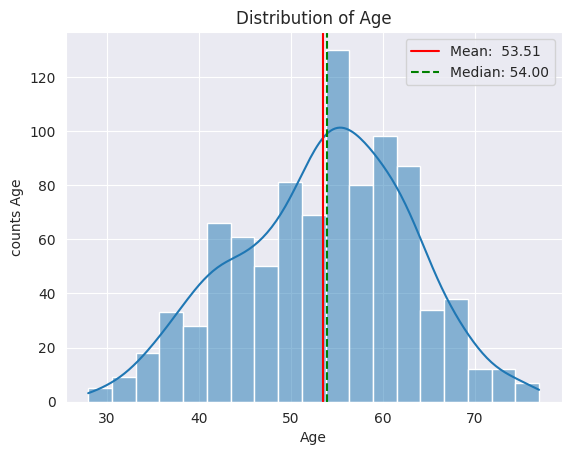

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



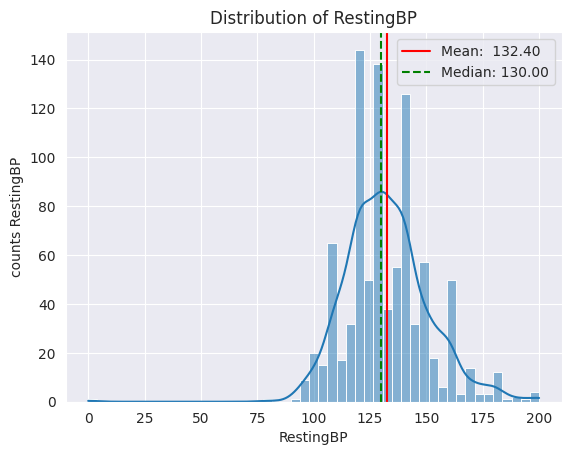

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



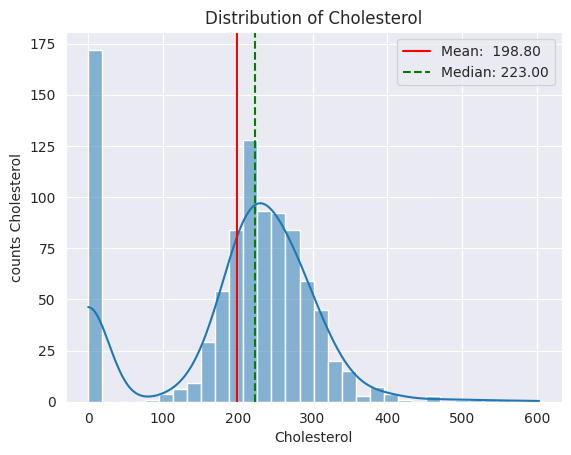

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



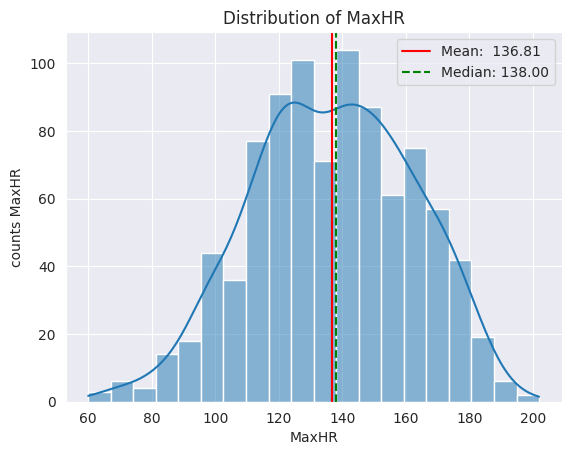

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



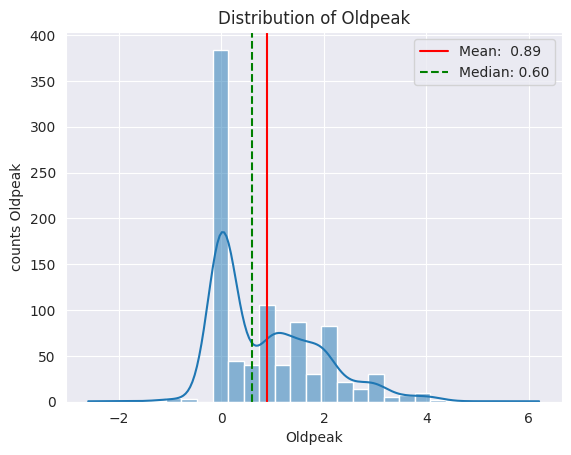

In [17]:
def hist_plot_columns(data):
    columns_numberic=data.select_dtypes(np.number).drop(columns=['FastingBS','HeartDisease'],axis=1)
    for column in columns_numberic:
        sns.histplot(data=data,x=column,kde=True)
        mean_columns=data[column].mean()    
        median_column=data[column].median()
        plt.axvline(mean_columns,color='r',linestyle='-',label=f"Mean:  {mean_columns:.2f}") 
        plt.axvline(median_column,color='g',linestyle='--',label=f"Median: {median_column:.2f}")  
        plt.title(f'Distribution of {column}') 
        plt.xlabel(f"{column}")
        plt.ylabel(f'counts {column}')
        plt.legend()
        plt.show()
hist_plot_columns(data)

## <div style="background-color:  #add8e6; color: #800080; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Step 6 : Brivate Analysis (Numerical)</span></div>


In [18]:
#The relationship (RestingBP,Cholesterol)
fig = px.scatter(data, x='RestingBP',y='Cholesterol',
                        template='plotly_dark',symbol="HeartDisease", color_continuous_scale=["blue", "red"]
                        ,labels={'X':'RestingBP',"index":'Counts'} )

fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [19]:
#The relationship (MaxHR,Age)
fig = px.scatter(data, x='MaxHR',y='Age',
                        template='plotly_dark',symbol="HeartDisease", color_continuous_scale=["blue", "red"]
                        ,labels={'X':'RestingBP',"index":'Counts'} )

fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [20]:
#The relationship (Age,Cholesterol)

fig = px.scatter(data, x='Age',y='Cholesterol',
                        template='plotly_dark',symbol="HeartDisease", color_continuous_scale=["blue", "red"]
                        ,labels={'X':'RestingBP',"index":'Counts'} )

fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [21]:
#The relationship (Age,RestingBP)
fig = px.scatter(data, x='Age',y='RestingBP',
                        template='plotly_dark',symbol="HeartDisease", color_continuous_scale=["blue", "red"]
                        ,labels={'X':'RestingBP',"index":'Counts'} )

fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

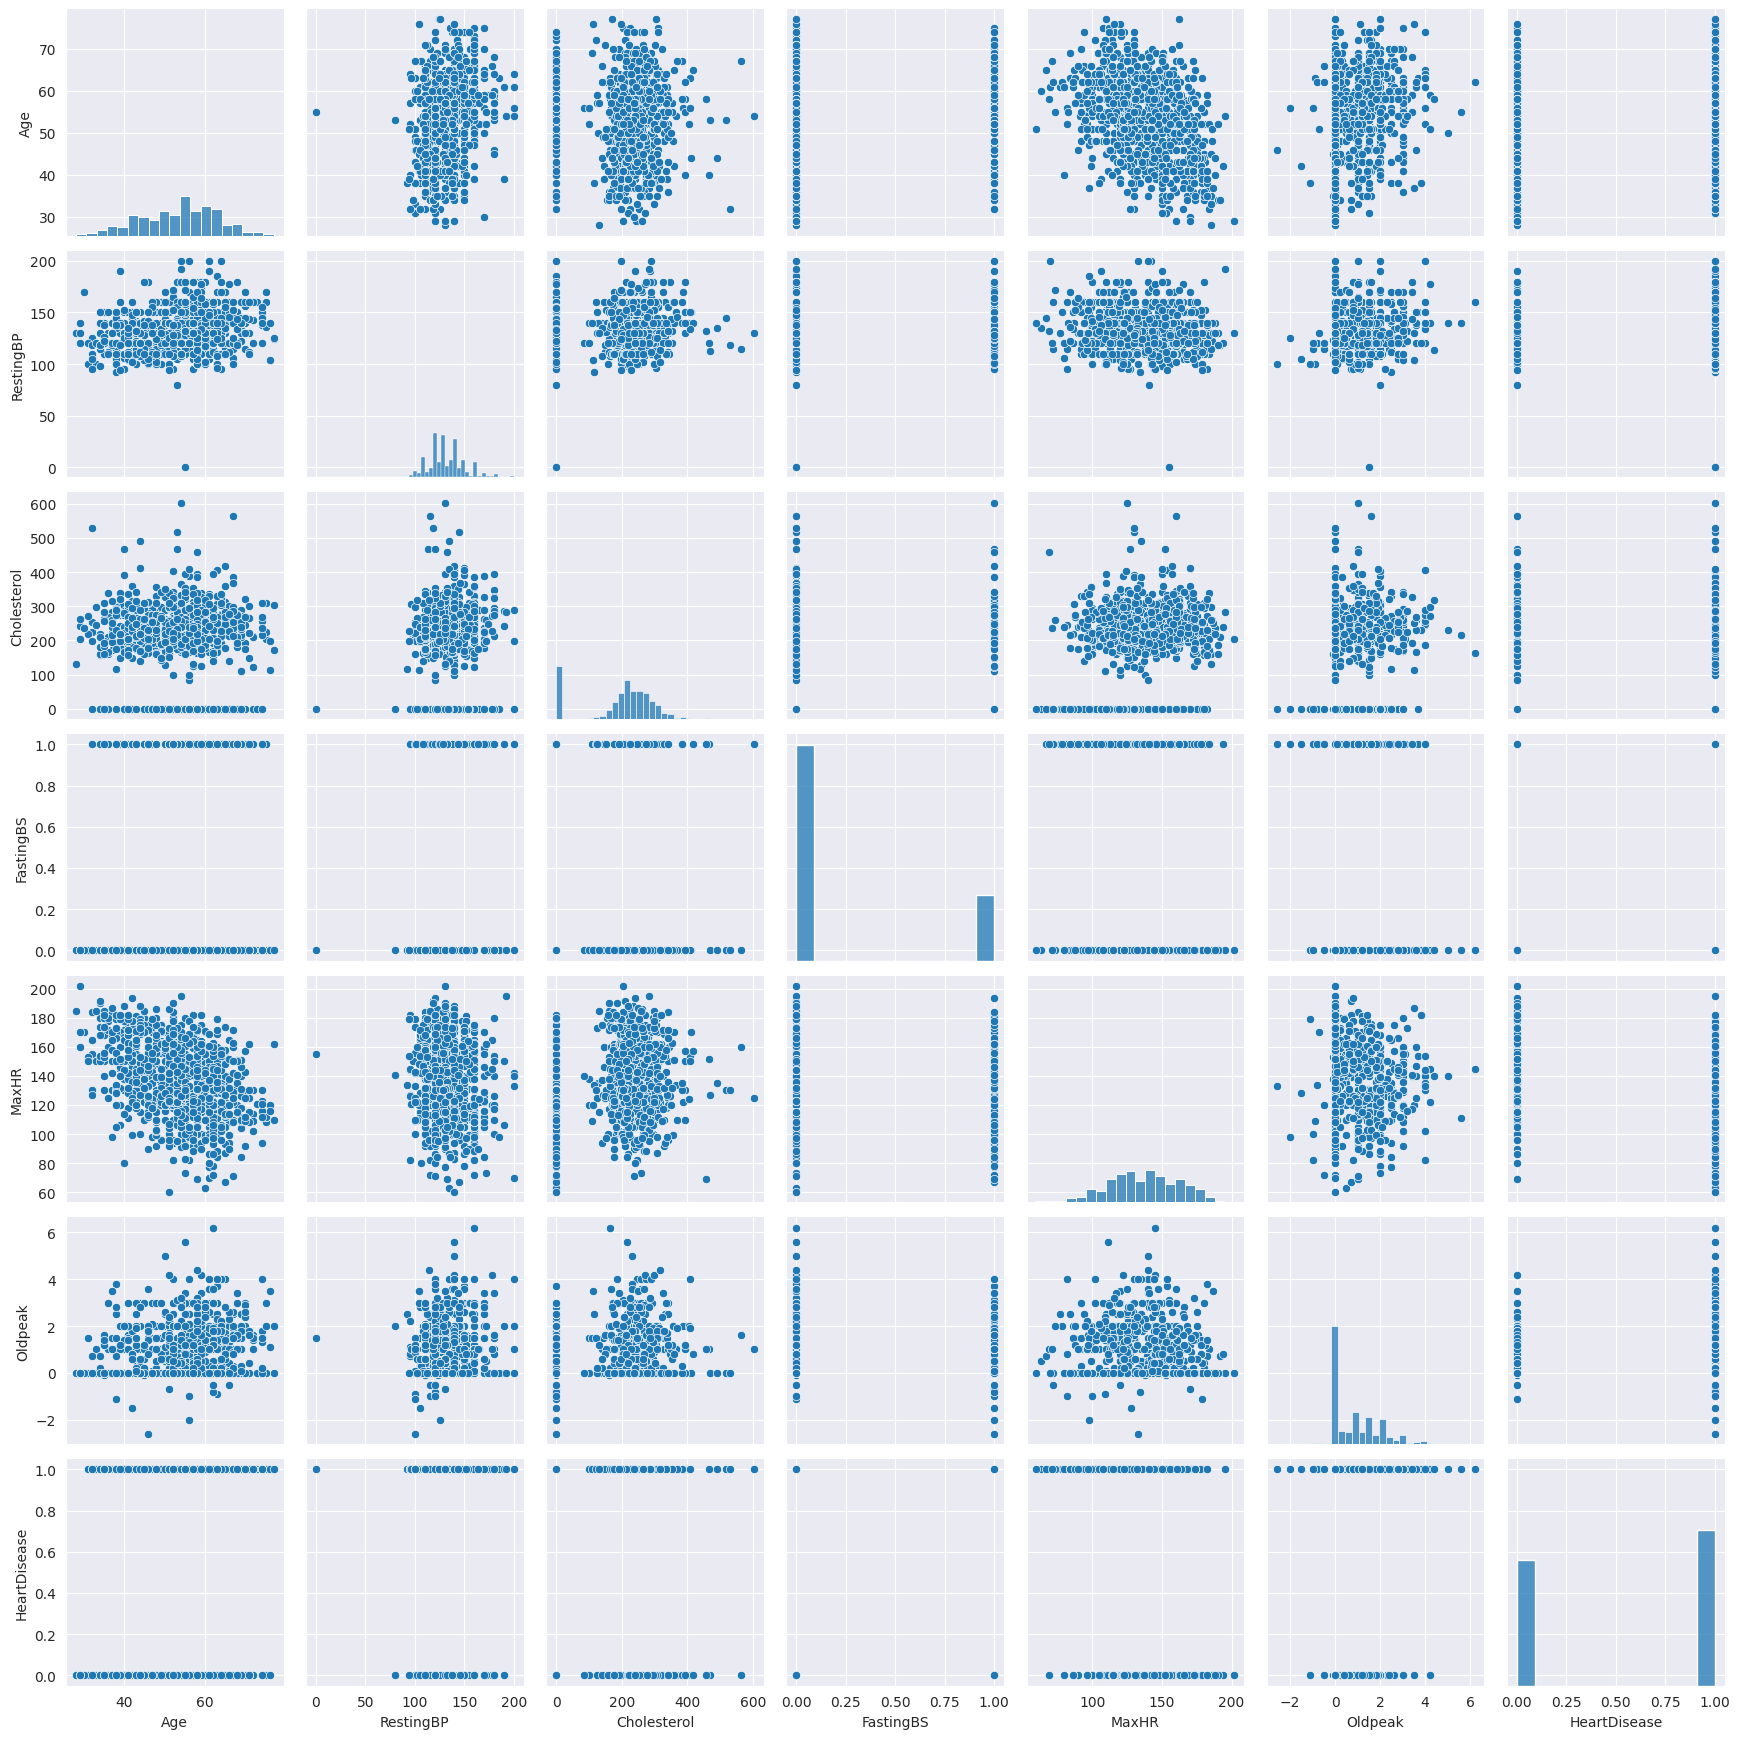

In [22]:
def scatter_matrix_relationship(data, color_feature=None):
    sns.pairplot(data=data)    
    plt.tight_layout()
    plt.show()

scatter_matrix_relationship(data, color_feature='HeartDisease')


## <div style="background-color:  #add8e6; color: #800080; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Step 7 : Preprocessing Data 🛠️</span></div>
 

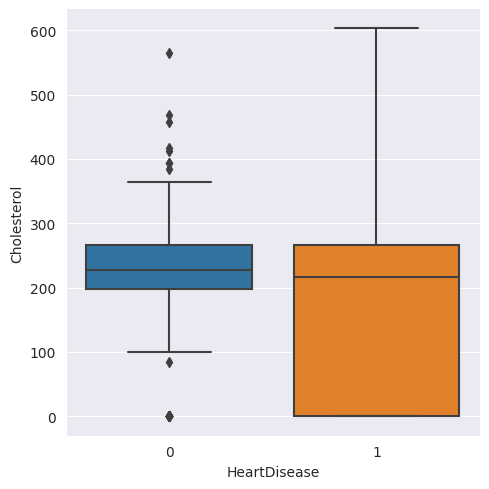

In [23]:
sns.catplot(data=data,x='HeartDisease',y='Cholesterol',kind='box')
plt.show()

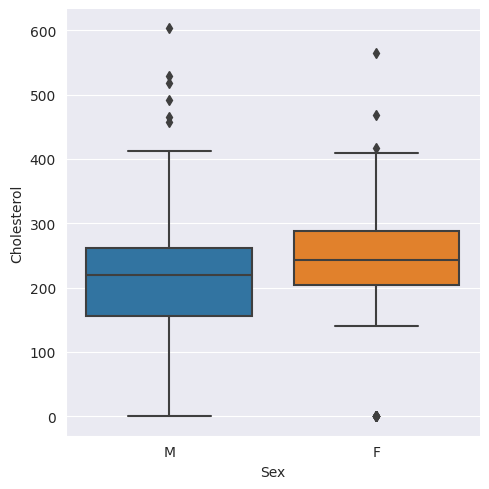

In [24]:
sns.catplot(data=data,x='Sex',y='Cholesterol',kind='box')


In [25]:
data[['RestingBP','Cholesterol']]=data[['RestingBP','Cholesterol']].replace(0,np.nan)

 <div style="background-color: darkcyan; color:purple; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Handling_values_median 🛠️</span></div>
 

In [26]:
def Handling_values_median (name_col):
    temp=data[data[name_col].notnull()]
    temp=temp.groupby(['HeartDisease','Sex'])[name_col].median().reset_index()
    return temp

In [27]:
columns=['RestingBP','Cholesterol']
for column in columns:                   
    data.loc[(data['HeartDisease']==0)& (data['Sex']=='F') & (data[column].isna()),column]=Handling_values_median(column)[column][0]
    data.loc[(data['HeartDisease']==0) & (data['Sex']=='M')&(data[column].isna()),column]=Handling_values_median(column)[column][1]
    data.loc[(data['HeartDisease']==1)& (data['Sex']=='F') & (data[column].isna()),column]=Handling_values_median(column)[column][2]
    data.loc[(data['HeartDisease']==1) & (data['Sex']=='M')&(data[column].isna()),column]=Handling_values_median(column)[column][3]




 <div style="background-color: mediumaquamarine; color:rebeccapurple; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Handling_outlires_ 🛠️ ☠️</span></div>
  

In [28]:
# Handling Out Lires: 
def Handling_outlires_(data):
    col_numeric=data.select_dtypes(np.number).drop(columns=['FastingBS','HeartDisease'], axis=1).columns
    for column in col_numeric:
        Q1=data[column].quantile(.25)
        Q3=data[column].quantile(.75)
        IQR=Q3-Q1
        Lower_bounds=Q1 - IQR * 1.5
        Upper_bounds=Q3 + IQR * 1.5
        data[column]=np.where(data[column] < Lower_bounds ,Lower_bounds,data[column])
        data[column]=np.where(data[column] > Upper_bounds,Upper_bounds,data[column])
Handling_outlires_(data)



In [29]:
pd.crosstab(data['HeartDisease'],data['RestingECG'])

RestingECG,LVH,Normal,ST
HeartDisease,,,
0,82,267,61
1,106,285,117


In [30]:
data.groupby(['RestingECG','HeartDisease'],as_index=False)['MaxHR'].mean()

,RestingECG,HeartDisease,MaxHR
0,LVH,0,152.780488
1,LVH,1,135.641509
2,Normal,0,148.782772
3,Normal,1,126.578947
4,ST,0,139.163934
5,ST,1,123.119658


In [31]:
data.groupby(['HeartDisease'],as_index=False)['ST_Slope'].value_counts()

,HeartDisease,ST_Slope,count
0,0,Up,317
1,0,Flat,79
2,0,Down,14
3,1,Flat,381
4,1,Up,78
5,1,Down,49


<div style="background-color:  gray; color: #800080; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Heat Map 📃 </span></div>
  

In [32]:
data_heat_map=data.select_dtypes(np.number).drop(columns=['HeartDisease','FastingBS'],axis=1)
data_heat_map_corr=data_heat_map.corr().round(2)

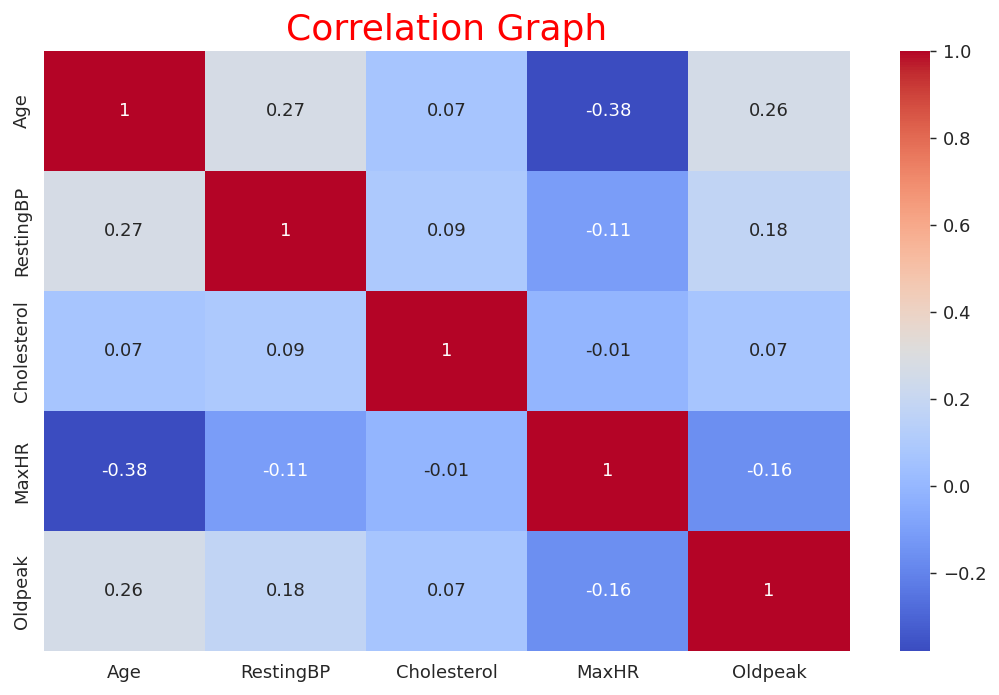

In [33]:
plt.figure (figsize = [10,6],  dpi = 130 )
plt.title ("Correlation Graph" , fontsize = 20,color='red' )
sns.heatmap(data_heat_map_corr,annot=True, cmap="coolwarm" )
plt.show()

 <div style="background-color: navy; color:moccasin; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Handling columns category 🚀</span></div>
  

In [34]:
# Handling columns category :
data['ExerciseAngina']=data['ExerciseAngina'].map({'Y':1,'N':0})
data['RestingECG']=data['RestingECG'].map({'Normal':-1,'LVH':0,'ST':1})
data['ST_Slope']=data['ST_Slope'].map({'Down':-1,'Flat':0,'Up':1})
cat_hot_enc=['Sex','ChestPainType']
col_Sex=pd.get_dummies(data['Sex'],drop_first=True,dtype=int)
col_ChestPainType=pd.get_dummies(data['ChestPainType'],drop_first=True,dtype=int)
data=pd.concat([col_Sex,data],axis=1)
data=pd.concat([col_ChestPainType,data],axis=1)
data=data.drop(columns=['Sex','ChestPainType'])


## <div style="background-color:  orchid; color: #800080; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Step 8 : Train And Test Data Use Hold Out ✂️ </span></div>
 

In [35]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,shuffle=True,random_state=44,stratify=y)

In [37]:
StandardScaler_=StandardScaler()
X_train_scaler=StandardScaler_.fit_transform(X_train)
X_test_scaler=StandardScaler_.fit_transform(X_test)

In [38]:
X_train_scaler_=pd.DataFrame(X_train_scaler,columns=X_train.columns)
X_test_scaler_=pd.DataFrame(X_test_scaler,columns=X_test.columns)


## <div style="background-color:  palevioletred; color: #800080; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Step 9 : Evaluate the Machine Learning Models 📃 </span></div>
  

In [39]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),  # Add Random Forest here
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(probability=True),
}

In [40]:
# Initialize empty DataFrame to store results
results = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-score','AUC','socre_train'])

# Train each classifier and store the results
for name, classifier in classifiers.items():
    classifier.fit(X_train_scaler_, y_train)
    y_pred = classifier.predict(X_test_scaler_)
    y_prob=classifier.predict_proba(X_test_scaler_)[:,1]
    AUC=roc_auc_score(y_test,y_prob)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    socre_train=classifier.score(X_train_scaler_,y_train)
    # Append results to DataFrame
    results = pd.concat([results, pd.DataFrame({'Classifier': [name], 'Accuracy': [accuracy],
                                                'Precision': [precision], 'Recall': [recall],
                                                'F1-score': [f1],"AUC":AUC,'socre_train':[socre_train]})], ignore_index=True)

# Sort results by accuracy
results_sorted = results.sort_values(by=['AUC','Accuracy'], ascending=False)

/tmp/ipykernel_23/3214520541.py:16: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



<div style="background-color:  palevioletred; color: #800080; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Show Result Model 📃 </span></div>
  

In [41]:
results_sorted

,Classifier,Accuracy,Precision,Recall,F1-score,AUC,socre_train
2,Random Forest,0.862319,0.862187,0.862319,0.862069,0.923482,1.000000
5,Gradient Boosting,0.862319,0.863062,0.862319,0.862508,0.919603,0.967290
0,Logistic Regression,0.862319,0.862187,0.862319,0.862069,0.916893,0.858255
6,KNN,0.855072,0.857184,0.855072,0.855409,0.913332,0.873832
3,Naive Bayes,0.858696,0.858827,0.858696,0.858750,0.910729,0.834891
7,SVC,0.851449,0.851261,0.851449,0.851253,0.903767,0.898754
4,AdaBoost,0.807971,0.812671,0.807971,0.808530,0.886817,0.903427
1,Decision Tree,0.811594,0.811450,0.811594,0.810828,0.806153,1.000000


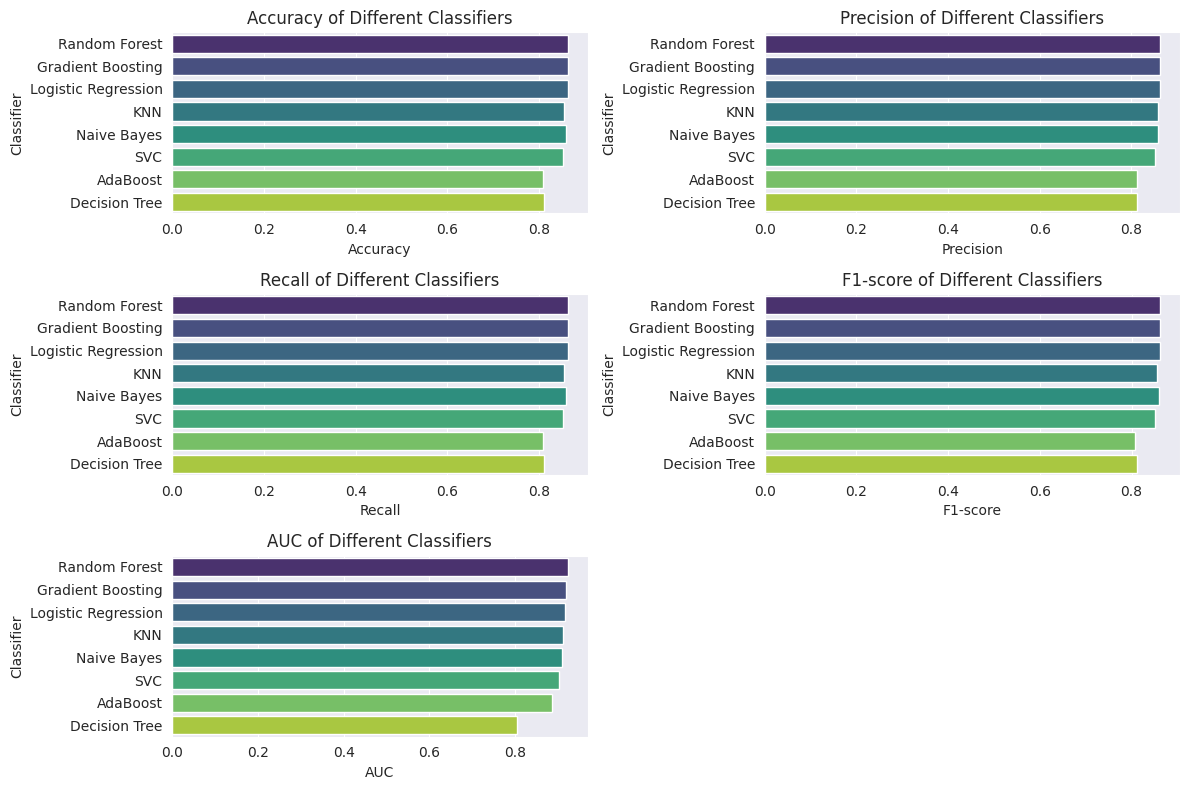

In [42]:
# Visualization the result
plt.figure(figsize=(12, 8))

# Define the metrics to visualize
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score','AUC']

# Create subplots for each metric
for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)
    sns.barplot(data=results_sorted, x=metric, y='Classifier', palette='viridis')
    plt.xlabel(metric)
    plt.ylabel('Classifier')
    plt.title(f'{metric} of Different Classifiers')

plt.tight_layout()
plt.show()


<div style="background-color:  olive; color: #800080; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Select The Model 😃 </span></div>
  

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       120
           1       0.88      0.87      0.87       156

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



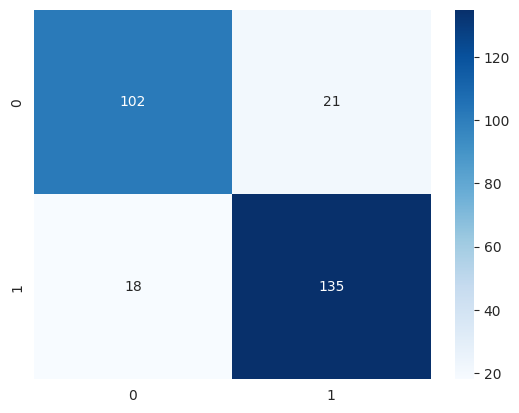

In [43]:
# Visualization confusion_matrix :
RandomForestClassifier_model=classifiers['Random Forest']
RandomForestClassifier_model.fit(X_train_scaler_,y_train)
y_pred=RandomForestClassifier_model.predict(X_test_scaler_)
confusion_matrix_=confusion_matrix(y_test,y_pred)
print(classification_report(y_pred,y_test))
sns.heatmap(confusion_matrix_, annot=True, fmt='g', cmap='Blues')
plt.show()

## <div style="background-color:  silver; color: #800080; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Step 10 : Train And Test Data Use Cross Validation ✂️ </span></div>
 

In [44]:
# Initialize empty DataFrame to store results
results = pd.DataFrame(columns=['Classifier', 'Accuracy_Use_cross_val_score', 'test_precision_macro', 'test_recall_macro', 'test_f1_macro','test_roc_auc'])
scoring  =['accuracy', 'precision_macro', 'recall_macro', 'f1_macro','roc_auc']

# Train each classifier and store the results
for name, classifier in classifiers.items():
    accuracy_mean=cross_val_score(classifier,StandardScaler_.fit_transform(X),y,cv=KFold(n_splits=10,shuffle=True,random_state=44),n_jobs=-1).mean().round(2)*100
    cross_validate_=cross_validate(classifier,StandardScaler_.fit_transform(X),y,scoring=scoring,cv=KFold(n_splits=10,shuffle=True,random_state=44),n_jobs=-1)
    test_precision_macro=cross_validate_['test_precision_macro'].mean()
    test_recall_macro=cross_validate_['test_recall_macro'].mean()
    test_f1_macro=cross_validate_['test_f1_macro'].mean()
    test_roc_auc=cross_validate_['test_roc_auc'].mean()

    # Append results to DataFrame
    results = pd.concat([results, pd.DataFrame({'Classifier': [name], 'Accuracy_Use_cross_val_score': [accuracy_mean],
                                "test_precision_macro":[test_precision_macro],
                                'test_recall_macro':[test_recall_macro],
                                'test_f1_macro':[test_f1_macro],
                                'test_roc_auc':[test_roc_auc]})], ignore_index=True)

# Sort results by accuracy
results_sorted = results.sort_values(by=['Accuracy_Use_cross_val_score','test_roc_auc'], ascending=False)

/tmp/ipykernel_23/1132299383.py:15: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [45]:
results_sorted

,Classifier,Accuracy_Use_cross_val_score,test_precision_macro,test_recall_macro,test_f1_macro,test_roc_auc
5,Gradient Boosting,88.0,0.879182,0.877418,0.876725,0.936551
2,Random Forest,88.0,0.866563,0.860538,0.861667,0.930299
0,Logistic Regression,86.0,0.856300,0.849663,0.850355,0.915272
4,AdaBoost,86.0,0.864455,0.860786,0.860884,0.914145
7,SVC,86.0,0.862188,0.852037,0.854202,0.913036
6,KNN,86.0,0.856616,0.853237,0.853225,0.901910
3,Naive Bayes,84.0,0.843333,0.841441,0.840372,0.905231
1,Decision Tree,78.0,0.776140,0.774064,0.773787,0.774064


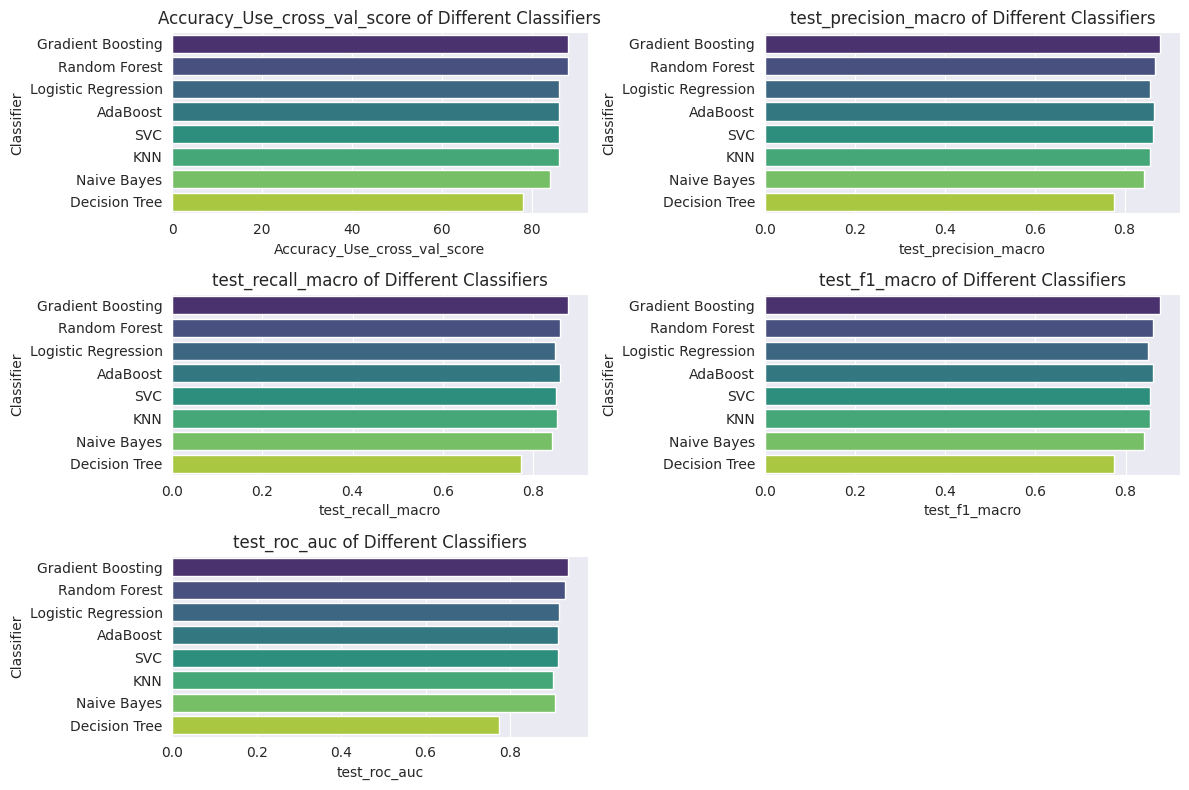

In [46]:
# Visualization the result
plt.figure(figsize=(12, 8))

# Define the metrics to visualize
metrics = ['Accuracy_Use_cross_val_score', 'test_precision_macro', 'test_recall_macro', 'test_f1_macro','test_roc_auc']

# Create subplots for each metric
for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)
    sns.barplot(data=results_sorted, x=metric, y='Classifier', palette='viridis')
    plt.xlabel(metric)
    plt.ylabel('Classifier')
    plt.title(f'{metric} of Different Classifiers')

plt.tight_layout()
plt.show()


# <div style="background-color:  silver; color: #800080; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span> Thank You All 🌹 </span></div>
 